In [ ]:
基于fashion_mnist数据集，建立mlp模型，实现服饰图片十分类task：：

1、实现图像数据加载、可视化
2、进行数据预处理：维度转化，归一化、输出结果格式转化
3、建立mlp模型，进行模型训练与预测，计算模型在训练、测试数据集的准确率
4、选取一个测试样本，预测其类别
5、选取测试集中9个样本，分别预测其类别

模型结构：两层隐藏层（激活函数：relu），分别有392、196个神经元；输出层10类，激活函数softmax

In [2]:
# 数据加载
from keras.datasets import fashion_mnist
import numpy as np
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print(type(X_train),X_train.shape)

4423680/4422102 [==============================] - 22s 5us/step
<class 'numpy.ndarray'> (60000, 28, 28)


Text(0.5, 1.0, 'raw img1')

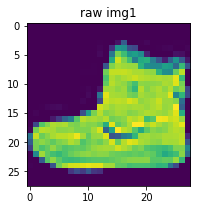

In [10]:
# 样本可视化
img1 = X_train[0]
# 引入画图包
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('raw img1')

In [13]:
# 数据预处理 将三维数据转为二维
# 60000个图片 每个图28*28像素点 
feature_size = img1.shape[0]* img1.shape[1]
print(feature_size)
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape,X_train.shape)

784
(60000, 784) (60000, 28, 28)


In [15]:
# 数据归一化
X_train_normal =  X_train_format/225
X_test_normal =  X_test_format/225
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00444444 0.         0.         0.05777778 0.32444444 

In [16]:
# 对于输出结果y进行one hot预处理
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_train_format[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [19]:
# 模型建立
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(units=392,input_dim=784,activation='relu'))
mlp.add(Dense(units=196,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 模型参数确立
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy']) # metics同时显示精确度
# 模型训练
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.4692 - categorical_accuracy: 0.8313
Epoch 2/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.3560 - categorical_accuracy: 0.8702
Epoch 3/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.3234 - categorical_accuracy: 0.8799
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.2976 - categorical_accuracy: 0.8885
Epoch 5/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.2816 - categorical_accuracy: 0.8940
Epoch 6/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2663 - categorical_accuracy: 0.8991
Epoch 7/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2542 - categorical_accuracy: 0.9036
Epoch 8/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.2418 - categorical_accuracy: 0.9086
Epoch 9/10
60000/60000 [========================

In [26]:
# 结果预测
y_train_predict = mlp.predict_classes(X_train_normal)
y_test_predict = mlp.predict_classes(X_test_normal)
print(y_train_predict)

[9 0 0 ... 3 0 5]


In [27]:
# 模型表现评估
from sklearn.metrics import accuracy_score
accurancy_train = accuracy_score(y_train,y_train_predict)
accurancy_test = accuracy_score(y_test,y_test_predict)
print(accurancy_train)
print(accurancy_test)

0.9253333333333333
0.8898


In [28]:
# 创建结果标签字典
label_dic={0:'T shirt',1:'裤子',2:'套头衫',3:'裙子',4:'外套 ',5:'凉鞋',6:'衬衫',7:'运动鞋',8:'包 ',9:'踝靴'}
print(label_dic)

{0: 'T shirt', 1: '裤子', 2: '套头衫', 3: '裙子', 4: '外套 ', 5: '凉鞋', 6: '衬衫', 7: '运动鞋', 8: '包 ', 9: '踝靴'}


Text(0.5, 1.0, '包 ')

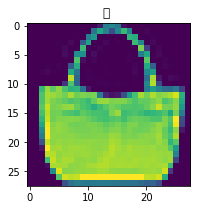

In [33]:
# 对结果可视化
# 样本可视化
img1 = X_train[100]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(label_dic[y_train_predict[100]])

In [31]:
label_dic[y_train_predict[100]]

'包 '

[1, 2, 3, 4, 5, 6, 7, 8, 9]


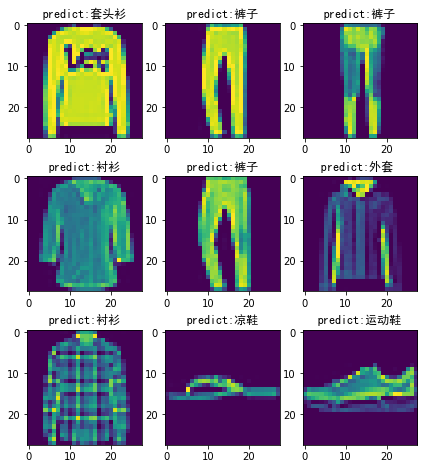

In [48]:
a = [i for i in range(1,10)]
print(a)
fig4 = plt.figure(figsize=(7,8))
font2 = {'family':'SimHei'}# 显示中文字符
for i in a:
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(label_dic[y_test_predict[i]]),font2)
    